# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [1]:
import config
%cd {config.PROJECT_DIR}

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main


C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Imports

In [2]:
# run
from timeit import default_timer as timer
import seml

In [3]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\torch\utils\cpp_extension.py:414: UserWarning: Error checking compiler version for cl: [WinError 2] Das System kann die angegebene Datei nicht finden
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
Use from seml.experiment import setup_logger instead.
Note that seml.experiment.Experiment already includes the logger setup.
See https://github.com/TUM-DAML/seml/blob/master/examples/example_experiment.py


[04/25/25 13:06:57] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=787785;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=220957;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

[04/25/25 13:06:58] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=83140;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=795346;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

[04/25/25 13:06:59] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=956255;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=307151;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=556504;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=419443;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=331788;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=303666;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=796185;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=909887;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#163\163]8;;\

                    INFO     Memory Usage after loading the dataset:                        ]8;id=93567;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=996290;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=218881;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=104891;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#184\184]8;;\

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\models\gcn.py:315: UserWarning: torch.sparse.SparseTensor(indices, values, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:634.)
  adj = get_ppr_matrix(torch.sparse.FloatTensor(edge_idx, edge_weight), **self.gdc_params)
C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\torch_sparse\tensor.py:574: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(rowptr, col, value, self.sizes())


[04/25/25 13:07:00] INFO                                                                                ]8;id=334608;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=158465;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94479, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[04/25/25 13:07:09] INFO                                                                                ]8;id=966702;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=369874;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09288, loss_val: 0.42195, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/25/25 13:07:16] INFO                                                                                ]8;id=902358;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=836056;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07167, loss_val: 0.37600, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/25/25 13:07:23] INFO                                                                                ]8;id=354778;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=769725;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07151, loss_val: 0.39939, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[04/25/25 13:07:30] INFO                                                                                ]8;id=925917;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=620510;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06845, loss_val: 0.38217, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[04/25/25 13:07:38] INFO                                                                                ]8;id=265353;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=434462;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06988, loss_val: 0.36415, acc_train: 1.00000,               
                             acc_val: 0.89286                                                                      

[04/25/25 13:07:44] INFO                                                                                ]8;id=327684;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=393789;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06436, loss_val: 0.40361, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

[04/25/25 13:07:48] INFO     Test accuracy is 0.834782600402832 with seed 0                 ]8;id=610228;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=452224;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#216\216]8;;\

                    INFO     Lock 2825853755792 acquired on cache\demo.json.lock                    ]8;id=276333;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=965924;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2825853755792 released on cache\demo.json.lock                    ]8;id=551644;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=883181;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

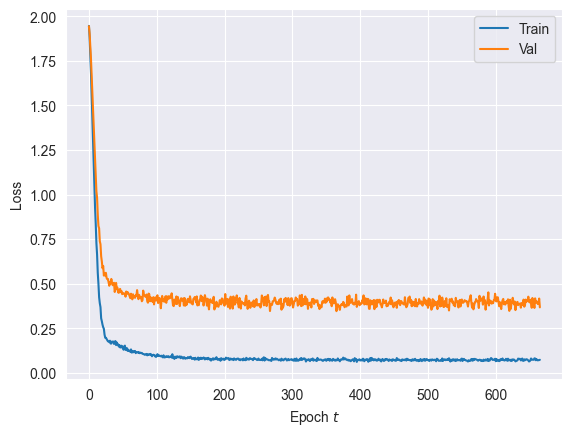

In [4]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()
"123"
plt.show()

In [5]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.48%


## 1.1 Certificate integration

In [6]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [7]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [8]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [9]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0023, -0.0189, -0.0035,  ..., -0.0007, -0.0108, -0.0372],
        [-0.0070, -0.0108,  0.0022,  ..., -0.0066,  0.0141, -0.0339],
        [-0.0054, -0.0265, -0.0035,  ..., -0.0038, -0.0105, -0.0156],
        ...,
        [-0.0097, -0.0432,  0.0009,  ..., -0.0076, -0.0051, -0.0220],
        [ 0.0114,  0.0189,  0.0013,  ...,  0.0031,  0.0030, -0.0291],
        [ 0.0093, -0.0134, -0.0022,  ...,  0.0038,  0.0085,  0.0331]],
       requires_grad=True)
GCNConv(64, 7)


In [10]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [11]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 1000
#n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0.01, #0
    'pf_minus_adj': 0.6, #0
    'pf_plus_att': 0,# 0.01
    'pf_minus_att': 0,# 0.6
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000

import torch

# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[968   0   0 ...   0  31   1]
 [900   2   0 ...   0  84  14]
 [569   0   0 ...   0 429   2]
 ...
 [883   0   0 ...   3  99  15]
 [514   0   0 ...   0 176 310]
 [809   0   0 ...   8  87  96]]


In [12]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)

print(grid_binary_class)


max_ra=3, max_rd=9, min_p_emp=0.6970



[[[1.00000000e+00 9.21734063e-01 8.70861203e-01 ... 5.17527111e-02
   3.51760247e-02 4.22923738e-03]
  [5.77312787e-01 5.62566099e-01 5.35634063e-01 ... 3.24250070e-02
   2.26722722e-02 2.78768589e-03]
  [3.49886538e-01 3.43312787e-01 3.29346099e-01 ... 2.02958546e-02
   1.45655052e-02 2.71582106e-03]
  [2.12052447e-01 2.09486538e-01 2.02444787e-01 ... 1.26922609e-02
   9.33008720e-03 2.27263090e-03]
  [1.28516635e-01 1.27812447e-01 1.24404138e-01 ... 7.93043600e-03
   5.96075004e-03 1.75996963e-03]]

 [[1.00000000e+00 7.95093401e-01 6.61904111e-01 ... 2.46545643e-03
   2.31945258e-03 1.59387224e-03]
  [5.30796474e-01 4.85814182e-01 4.08993401e-01 ... 1.51546248e-03
   1.43736010e-03 1.01083283e-03]
  [3.21694833e-01 2.96796474e-01 2.52594182e-01 ... 9.31316800e-04
   8.90296834e-04 6.39851100e-04]
  [1.94966565e-01 1.81294833e-01 1.55928474e-01 ... 5.72211675e-04
   5.51190746e-04 4.04314367e-04]
  [1.18161555e-01 1.10726565e-01 9.62124328e-02 ... 3.51500173e-04
   3.41094730e-04 2.5

In [13]:
grid_radii = (grid_binary_class>0.5)

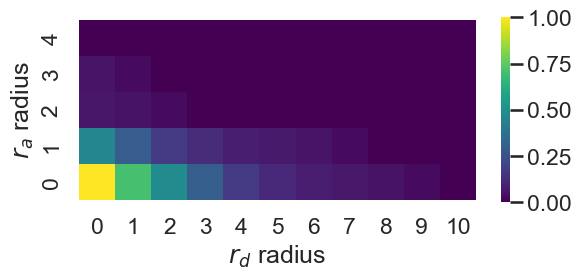

In [14]:
import seaborn as sns

heatmap = (grid_binary_class>0.5).mean(0)
sns.set_context('talk')
sns.heatmap(heatmap,
            cmap='viridis',
            vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
plt.xlim(0, heatmap.shape[1])
plt.ylim(0, heatmap.shape[0])
plt.xlabel('$r_d$ radius')
plt.ylabel('$r_a$ radius')
plt.show()

In [15]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 33.487544483985765 percent of nodes are certifiably robust


In [16]:
grid_radii_one_deletion_false = grid_radii[:,0,1]
grid_radii_one_deletion_false

array([ True,  True, False, ...,  True, False,  True])

## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack with grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics_cert = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100, #this may have to be adjusted to epochs
        search_space_size = 100, #is here the same varibale error as in global_attack ?
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii,
    use_cert=True,
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.1.1 Local PR-BCD Attack without grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 100,
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.2 Global PR-BCD Attack with Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [39]:
from DeleteCache import delete_pert_files_and_folders
# partly_drawn_nodes decides whether nodes have to be drawn completely from unrobust nodes_set
# Some changes, but not significant
partly_drawn_nodes = [True]
#use_certificate = ["sampling_grid_radii", "sampling_grid_binary_class", "resampling_grid_radii", "sampling_grid_binary_class", "both_1", "both_2", "none"]
use_certificate = ["sampling_grid_radii", "sampling_grid_binary_class", "sampling_grid_binary_class_alt", "none"]
results_global_prbcd_cert = []
# Idea: Variables for sampling with or without certificate usage
# "sampling_grid_radii" = use certificates with grid_radii only in sampling
# "sampling_grid_binary_class" = use certificates with grid_binary_class only in sampling
# "resampling_grid_radii" = use certificates grid_radii only in resampling
# "resampling_grid_binary_class" = use certificates with grid_binary_class only in resampling
# "both_1" = use certificate in both sampling (grid_radii) and resampling
# "both_2" = use certificate in both sampling (grid_binary_class) and resampling
# "none" = use no certificate
for semi in partly_drawn_nodes:
    for use_cert in use_certificate:
        
        delete_pert_files_and_folders(
        cache_dir="cache",
        pert_adj_storage_type="evasion_global_adj",
        pert_attr_storage_type="evasion_global_attr"
        )
        start = timer()
        global_prbcd_statistics_cert = experiment_global_attack_direct.run(
            data_dir = './data',
            dataset = 'cora_ml',
            attack = 'PRBCD',
            attack_params = dict(
                epochs= 50, #500
                fine_tune_epochs= 25, #100,
                keep_heuristic="WeightOnly",
                search_space_size=100_000, #this may be wrong variable name (block_size?)
                block_size=2000, #100_000
                do_synchronize=True,
                loss_type="tanhMargin",
            ),
            epsilons = [0.25],
            binary_attr = False,
            make_undirected = True,
            seed=0,
            artifact_dir = 'cache',
            pert_adj_storage_type = 'evasion_global_adj',
            pert_attr_storage_type = 'evasion_global_attr',
            model_label = 'Vanilla GCN',
            model_storage_type = 'demo',
            #device = 0,
            #data_device = 0,
            device = "cpu",
            data_device = "cpu",
            debug_level = "info",
            semi = semi,
            use_cert=use_cert,
            grid_radii=grid_radii,
            grid_binary_class=grid_binary_class,
        )
        end = timer()
        time = end - start
        
        print("time: ", time)
        print(use_cert + ": ")
        print(global_prbcd_statistics_cert)
        results_global_prbcd_cert.append((use_cert, "semi:", semi, "time:", time, global_prbcd_statistics_cert))

def printItem(item):
    print(item)
    print("\n")


print("RESULTS")
[printItem(item) for item in results_global_prbcd_cert]


Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/28/25 01:50:05] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=55599;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=314999;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

[04/28/25 01:50:06] INFO     Lock 2826161466704 acquired on cache\demo.json.lock                    ]8;id=2724;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=203224;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826161466704 released on cache\demo.json.lock                    ]8;id=96037;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=106569;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=639976;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=73469;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2826015083536 acquired on cache\evasion_global_adj.json.lock      ]8;id=286982;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=95870;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826015083536 released on cache\evasion_global_adj.json.lock      ]8;id=957667;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=975574;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826015083536 acquired on cache\evasion_global_attr.json.lock     ]8;id=5587;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=580348;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826015083536 released on cache\evasion_global_attr.json.lock     ]8;id=153811;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=948222;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=76736;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=700606;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

sampling_grid_radii run sampling_grid_radii


                    INFO                                                                               ]8;id=49675;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=409413;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#102\102]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/28/25 01:50:10] INFO                                                                               ]8;id=666405;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=163475;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 0 Loss: -0.6509061455726624 Accuracy: 82.925 %                                 
                                                                                                                   

  2%|▏         | 1/50 [00:03<02:54,  3.56s/it]

sampling_grid_radii run resampling with no certificate


  4%|▍         | 2/50 [00:06<02:40,  3.35s/it]

sampling_grid_radii run resampling with no certificate


  6%|▌         | 3/50 [00:08<02:12,  2.82s/it]

sampling_grid_radii run resampling with no certificate


  8%|▊         | 4/50 [00:09<01:45,  2.30s/it]

sampling_grid_radii run resampling with no certificate


 10%|█         | 5/50 [00:10<01:27,  1.94s/it]

sampling_grid_radii run resampling with no certificate


 12%|█▏        | 6/50 [00:11<01:14,  1.68s/it]

sampling_grid_radii run resampling with no certificate


 14%|█▍        | 7/50 [00:12<01:07,  1.56s/it]

sampling_grid_radii run resampling with no certificate


 16%|█▌        | 8/50 [00:13<01:00,  1.43s/it]

sampling_grid_radii run resampling with no certificate


 18%|█▊        | 9/50 [00:14<00:55,  1.35s/it]

sampling_grid_radii run resampling with no certificate


 20%|██        | 10/50 [00:16<00:52,  1.30s/it]

sampling_grid_radii run resampling with no certificate


 22%|██▏       | 11/50 [00:17<00:49,  1.28s/it]

sampling_grid_radii run resampling with no certificate


 24%|██▍       | 12/50 [00:18<00:49,  1.30s/it]

sampling_grid_radii run resampling with no certificate


 26%|██▌       | 13/50 [00:19<00:48,  1.31s/it]

sampling_grid_radii run resampling with no certificate


 28%|██▊       | 14/50 [00:21<00:45,  1.26s/it]

sampling_grid_radii run resampling with no certificate


 30%|███       | 15/50 [00:22<00:41,  1.20s/it]

sampling_grid_radii run resampling with no certificate


 32%|███▏      | 16/50 [00:23<00:39,  1.15s/it]

sampling_grid_radii run resampling with no certificate


 34%|███▍      | 17/50 [00:24<00:37,  1.13s/it]

sampling_grid_radii run resampling with no certificate


 36%|███▌      | 18/50 [00:25<00:35,  1.11s/it]

sampling_grid_radii run resampling with no certificate


 38%|███▊      | 19/50 [00:26<00:34,  1.12s/it]

sampling_grid_radii run resampling with no certificate


 40%|████      | 20/50 [00:27<00:33,  1.11s/it]

sampling_grid_radii run resampling with no certificate


[04/28/25 01:50:35] INFO                                                                               ]8;id=880514;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=199254;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 20 Loss: -0.509386420249939 Accuracy: 74.387 %                                 
                                                                                                                   

 42%|████▏     | 21/50 [00:28<00:32,  1.11s/it]

sampling_grid_radii run resampling with no certificate


 44%|████▍     | 22/50 [00:29<00:31,  1.13s/it]

sampling_grid_radii run resampling with no certificate


 46%|████▌     | 23/50 [00:30<00:30,  1.11s/it]

sampling_grid_radii run resampling with no certificate


 48%|████▊     | 24/50 [00:32<00:30,  1.16s/it]

sampling_grid_radii run resampling with no certificate


[04/28/25 01:50:40] INFO     Loading search space of epoch 24 (accuarcy=0.739130437374115) for fine    ]8;id=549639;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=34392;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#175\175]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:50<00:11,  1.18s/it]

[04/28/25 01:50:58] INFO                                                                               ]8;id=804563;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=847871;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 40 Loss: -0.4818803668022156 Accuracy: 73.202 %                                
                                                                                                                   

100%|██████████| 50/50 [01:02<00:00,  1.25s/it]


[04/28/25 01:51:17] INFO     Lock 2826239733008 acquired on cache\evasion_global_adj.json.lock      ]8;id=855816;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=297271;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826239733008 released on cache\evasion_global_adj.json.lock      ]8;id=510293;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=196453;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826239733008 acquired on cache\evasion_global_attr.json.lock     ]8;id=104769;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=655867;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826239733008 released on cache\evasion_global_attr.json.lock     ]8;id=429456;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=59229;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  71.77674240013584
sampling_grid_radii: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.730434775352478}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


                    INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=244616;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=120572;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2826160618384 acquired on cache\demo.json.lock                    ]8;id=588649;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=237578;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826160618384 released on cache\demo.json.lock                    ]8;id=961927;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=811599;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=129078;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=205390;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2825952928720 acquired on cache\evasion_global_adj.json.lock      ]8;id=54784;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=553902;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2825952928720 released on cache\evasion_global_adj.json.lock      ]8;id=632344;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=366621;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826160727184 acquired on cache\evasion_global_attr.json.lock     ]8;id=692230;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=639071;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826160727184 released on cache\evasion_global_attr.json.lock     ]8;id=683537;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=181378;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=663157;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=101513;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

sampling_grid_binary_class run sampling_grid_binary_class


[04/28/25 01:51:18] INFO                                                                               ]8;id=53402;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=430604;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#102\102]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/28/25 01:51:19] INFO                                                                               ]8;id=596834;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=461540;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 0 Loss: -0.6509144306182861 Accuracy: 83.123 %                                 
                                                                                                                   

  2%|▏         | 1/50 [00:01<01:08,  1.40s/it]

sampling_grid_binary_class run resampling with no certificate


  4%|▍         | 2/50 [00:02<01:03,  1.32s/it]

sampling_grid_binary_class run resampling with no certificate


  6%|▌         | 3/50 [00:03<01:01,  1.32s/it]

sampling_grid_binary_class run resampling with no certificate


  8%|▊         | 4/50 [00:04<00:57,  1.26s/it]

sampling_grid_binary_class run resampling with no certificate


 10%|█         | 5/50 [00:06<00:54,  1.22s/it]

sampling_grid_binary_class run resampling with no certificate


 12%|█▏        | 6/50 [00:07<00:53,  1.23s/it]

sampling_grid_binary_class run resampling with no certificate


 14%|█▍        | 7/50 [00:08<00:51,  1.20s/it]

sampling_grid_binary_class run resampling with no certificate


 16%|█▌        | 8/50 [00:09<00:50,  1.19s/it]

sampling_grid_binary_class run resampling with no certificate


 18%|█▊        | 9/50 [00:11<00:51,  1.24s/it]

sampling_grid_binary_class run resampling with no certificate


 20%|██        | 10/50 [00:12<00:51,  1.30s/it]

sampling_grid_binary_class run resampling with no certificate


 22%|██▏       | 11/50 [00:13<00:49,  1.27s/it]

sampling_grid_binary_class run resampling with no certificate


 24%|██▍       | 12/50 [00:14<00:46,  1.23s/it]

sampling_grid_binary_class run resampling with no certificate


 26%|██▌       | 13/50 [00:15<00:44,  1.20s/it]

sampling_grid_binary_class run resampling with no certificate


 28%|██▊       | 14/50 [00:17<00:41,  1.17s/it]

sampling_grid_binary_class run resampling with no certificate


 30%|███       | 15/50 [00:18<00:39,  1.14s/it]

sampling_grid_binary_class run resampling with no certificate


 32%|███▏      | 16/50 [00:19<00:40,  1.18s/it]

sampling_grid_binary_class run resampling with no certificate


 34%|███▍      | 17/50 [00:20<00:37,  1.15s/it]

sampling_grid_binary_class run resampling with no certificate


 36%|███▌      | 18/50 [00:21<00:36,  1.13s/it]

sampling_grid_binary_class run resampling with no certificate


 38%|███▊      | 19/50 [00:22<00:34,  1.12s/it]

sampling_grid_binary_class run resampling with no certificate


 40%|████      | 20/50 [00:23<00:33,  1.12s/it]

sampling_grid_binary_class run resampling with no certificate


[04/28/25 01:51:43] INFO                                                                               ]8;id=780817;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=526704;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 20 Loss: -0.5132480263710022 Accuracy: 75.178 %                                
                                                                                                                   

 42%|████▏     | 21/50 [00:24<00:32,  1.13s/it]

sampling_grid_binary_class run resampling with no certificate


 44%|████▍     | 22/50 [00:26<00:37,  1.32s/it]

sampling_grid_binary_class run resampling with no certificate


 46%|████▌     | 23/50 [00:28<00:36,  1.35s/it]

sampling_grid_binary_class run resampling with no certificate


 48%|████▊     | 24/50 [00:29<00:34,  1.33s/it]

sampling_grid_binary_class run resampling with no certificate


[04/28/25 01:51:48] INFO     Loading search space of epoch 24 (accuarcy=0.7442687749862671) for fine   ]8;id=107561;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=684115;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#175\175]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:47<00:11,  1.20s/it]

[04/28/25 01:52:07] INFO                                                                               ]8;id=56078;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=37591;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 40 Loss: -0.48277509212493896 Accuracy: 73.794 %                               
                                                                                                                   

100%|██████████| 50/50 [01:03<00:00,  1.28s/it]


[04/28/25 01:52:33] INFO     Lock 2826017396944 acquired on cache\evasion_global_adj.json.lock      ]8;id=477914;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=153556;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826017396944 released on cache\evasion_global_adj.json.lock      ]8;id=977781;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=774750;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826161729040 acquired on cache\evasion_global_attr.json.lock     ]8;id=352199;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=772854;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826161729040 released on cache\evasion_global_attr.json.lock     ]8;id=467242;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=812311;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  76.61857259995304
sampling_grid_binary_class: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7359683513641357}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/28/25 01:52:34] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=77526;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=345185;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2826158524880 acquired on cache\demo.json.lock                    ]8;id=832080;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=32824;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826158524880 released on cache\demo.json.lock                    ]8;id=211824;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=556083;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=314569;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=445932;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2826015083536 acquired on cache\evasion_global_adj.json.lock      ]8;id=265475;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=250396;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826015083536 released on cache\evasion_global_adj.json.lock      ]8;id=911097;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=585293;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826158524880 acquired on cache\evasion_global_attr.json.lock     ]8;id=264093;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=179932;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826158524880 released on cache\evasion_global_attr.json.lock     ]8;id=165030;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=857490;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=325046;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=834533;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

sampling_grid_binary_class_alt run sampling_grid_binary_class
using alternative current_node_search_space sampling


[04/28/25 01:52:35] INFO                                                                               ]8;id=318191;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=213992;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#102\102]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/28/25 01:52:37] INFO                                                                               ]8;id=600789;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=533516;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 0 Loss: -0.6509119272232056 Accuracy: 83.241 %                                 
                                                                                                                   

  2%|▏         | 1/50 [00:02<01:46,  2.17s/it]

sampling_grid_binary_class_alt run resampling with no certificate


  4%|▍         | 2/50 [00:03<01:34,  1.98s/it]

sampling_grid_binary_class_alt run resampling with no certificate


  6%|▌         | 3/50 [00:04<01:19,  1.68s/it]

sampling_grid_binary_class_alt run resampling with no certificate


  8%|▊         | 4/50 [00:06<01:12,  1.58s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 10%|█         | 5/50 [00:08<01:18,  1.75s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 12%|█▏        | 6/50 [00:10<01:20,  1.83s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 14%|█▍        | 7/50 [00:12<01:27,  2.04s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 16%|█▌        | 8/50 [00:14<01:21,  1.94s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 18%|█▊        | 9/50 [00:15<01:14,  1.83s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 20%|██        | 10/50 [00:17<01:08,  1.71s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 22%|██▏       | 11/50 [00:18<01:02,  1.59s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 24%|██▍       | 12/50 [00:19<00:56,  1.49s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 26%|██▌       | 13/50 [00:21<00:52,  1.43s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 28%|██▊       | 14/50 [00:23<00:54,  1.52s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 30%|███       | 15/50 [00:24<00:53,  1.53s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 32%|███▏      | 16/50 [00:25<00:49,  1.44s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 34%|███▍      | 17/50 [00:26<00:45,  1.37s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 36%|███▌      | 18/50 [00:28<00:42,  1.32s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 38%|███▊      | 19/50 [00:29<00:45,  1.46s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 40%|████      | 20/50 [00:32<00:49,  1.66s/it]

sampling_grid_binary_class_alt run resampling with no certificate


[04/28/25 01:53:09] INFO                                                                               ]8;id=384828;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=635798;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 20 Loss: -0.5192238092422485 Accuracy: 75.573 %                                
                                                                                                                   

 42%|████▏     | 21/50 [00:33<00:46,  1.59s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 44%|████▍     | 22/50 [00:35<00:44,  1.59s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 46%|████▌     | 23/50 [00:36<00:40,  1.49s/it]

sampling_grid_binary_class_alt run resampling with no certificate


 48%|████▊     | 24/50 [00:37<00:37,  1.44s/it]

sampling_grid_binary_class_alt run resampling with no certificate


[04/28/25 01:53:15] INFO     Loading search space of epoch 24 (accuarcy=0.747826099395752) for fine    ]8;id=3678;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=56574;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#175\175]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [01:00<00:11,  1.15s/it]

[04/28/25 01:53:37] INFO                                                                               ]8;id=145884;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=214191;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 40 Loss: -0.4880918860435486 Accuracy: 73.874 %                                
                                                                                                                   

100%|██████████| 50/50 [01:12<00:00,  1.44s/it]


[04/28/25 01:53:55] INFO     Lock 2826158524880 acquired on cache\evasion_global_adj.json.lock      ]8;id=82976;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=786934;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826158524880 released on cache\evasion_global_adj.json.lock      ]8;id=642834;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=165171;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2825951531984 acquired on cache\evasion_global_attr.json.lock     ]8;id=626688;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=581273;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2825951531984 released on cache\evasion_global_attr.json.lock     ]8;id=456805;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=228768;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  82.01152889989316
sampling_grid_binary_class_alt: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7347826361656189}]}
Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/28/25 01:53:56] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=122128;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=713604;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 25, 'keep_heuristic': 'WeightOnly',                               
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 2825971566800 acquired on cache\demo.json.lock                    ]8;id=198079;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=804500;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2825971566800 released on cache\demo.json.lock                    ]8;id=121982;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=697991;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=575759;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=223249;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 2826017598224 acquired on cache\evasion_global_adj.json.lock      ]8;id=854850;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=99022;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826017598224 released on cache\evasion_global_adj.json.lock      ]8;id=688636;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=132681;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826230991248 acquired on cache\evasion_global_attr.json.lock     ]8;id=619350;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=881463;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826230991248 released on cache\evasion_global_attr.json.lock     ]8;id=355472;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=602519;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=861879;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=63888;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

none run sampling with no certificate


[04/28/25 01:53:57] INFO                                                                               ]8;id=756830;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=211981;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#102\102]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   

  0%|          | 0/50 [00:00<?, ?it/s]

[04/28/25 01:53:58] INFO                                                                               ]8;id=142271;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=677185;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 82.885 %                                 
                                                                                                                   

  2%|▏         | 1/50 [00:01<01:12,  1.49s/it]

none run resampling with no certificate


  4%|▍         | 2/50 [00:02<01:10,  1.46s/it]

none run resampling with no certificate


  6%|▌         | 3/50 [00:04<01:08,  1.46s/it]

none run resampling with no certificate


  8%|▊         | 4/50 [00:05<01:05,  1.43s/it]

none run resampling with no certificate


 10%|█         | 5/50 [00:06<00:59,  1.33s/it]

none run resampling with no certificate


 12%|█▏        | 6/50 [00:07<00:56,  1.29s/it]

none run resampling with no certificate


 14%|█▍        | 7/50 [00:09<00:52,  1.23s/it]

none run resampling with no certificate


 16%|█▌        | 8/50 [00:10<00:49,  1.18s/it]

none run resampling with no certificate


 18%|█▊        | 9/50 [00:11<00:51,  1.26s/it]

none run resampling with no certificate


 20%|██        | 10/50 [00:12<00:51,  1.29s/it]

none run resampling with no certificate


 22%|██▏       | 11/50 [00:14<00:51,  1.32s/it]

none run resampling with no certificate


 24%|██▍       | 12/50 [00:15<00:48,  1.26s/it]

none run resampling with no certificate


 26%|██▌       | 13/50 [00:16<00:44,  1.21s/it]

none run resampling with no certificate


 28%|██▊       | 14/50 [00:17<00:42,  1.18s/it]

none run resampling with no certificate


 30%|███       | 15/50 [00:18<00:40,  1.15s/it]

none run resampling with no certificate


 32%|███▏      | 16/50 [00:19<00:38,  1.13s/it]

none run resampling with no certificate


 34%|███▍      | 17/50 [00:20<00:37,  1.13s/it]

none run resampling with no certificate


 36%|███▌      | 18/50 [00:22<00:35,  1.12s/it]

none run resampling with no certificate


 38%|███▊      | 19/50 [00:23<00:35,  1.16s/it]

none run resampling with no certificate


 40%|████      | 20/50 [00:24<00:35,  1.18s/it]

none run resampling with no certificate


[04/28/25 01:54:22] INFO                                                                               ]8;id=373848;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=325908;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 20 Loss: -0.5134032964706421 Accuracy: 74.625 %                                
                                                                                                                   

 42%|████▏     | 21/50 [00:25<00:33,  1.16s/it]

none run resampling with no certificate


 44%|████▍     | 22/50 [00:27<00:34,  1.25s/it]

none run resampling with no certificate


 46%|████▌     | 23/50 [00:28<00:34,  1.28s/it]

none run resampling with no certificate


 48%|████▊     | 24/50 [00:29<00:33,  1.29s/it]

none run resampling with no certificate


[04/28/25 01:54:28] INFO     Loading search space of epoch 24 (accuarcy=0.7403162121772766) for fine   ]8;id=325362;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=419649;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#175\175]8;;\
                             tuning                                                                                
                                                                                                                   

 80%|████████  | 40/50 [00:48<00:11,  1.18s/it]

[04/28/25 01:54:46] INFO                                                                               ]8;id=626313;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=804780;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#148\148]8;;\
                             Epoch: 40 Loss: -0.4839021563529968 Accuracy: 73.281 %                                
                                                                                                                   

100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


[04/28/25 01:55:04] INFO     Lock 2826161702928 acquired on cache\evasion_global_adj.json.lock      ]8;id=645309;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=696417;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826161702928 released on cache\evasion_global_adj.json.lock      ]8;id=251911;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=495674;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 2826161702928 acquired on cache\evasion_global_attr.json.lock     ]8;id=447217;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=200609;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2826161702928 released on cache\evasion_global_attr.json.lock     ]8;id=352485;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=88265;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

time:  68.30050239991397
none: 
{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7292490005493164}]}
RESULTS
('sampling_grid_radii', 'semi:', True, 'time:', 71.77674240013584, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.730434775352478}]})


('sampling_grid_binary_class', 'semi:', True, 'time:', 76.61857259995304, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7359683513641357}]})


('sampling_grid_binary_class_alt', 'semi:', True, 'time:', 82.01152889989316, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7347826361656189}]})


('none', 'semi:', True, 'time:', 68.30050239991397, {'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.7292490005493164}]})



[None, None, None, None]

### 2.2.1 Global PR-BCD Attack without Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [67]:
from DeleteCache import delete_pert_files_and_folders

delete_pert_files_and_folders(
    cache_dir="cache",
    pert_adj_storage_type="evasion_global_adj",
    pert_attr_storage_type="evasion_global_attr"
)

global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=50,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        block_size=2000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
)

print(global_prbcd_statistics)

Deleted file: cache\evasion_global_adj.json
Deleted file: cache\evasion_global_attr.json
Deleted directory: cache\evasion_global_adj
Deleted directory: cache\evasion_global_attr


[04/04/25 18:08:49] INFO     {'dataset': 'cora_ml', 'attack': 'PRBCD', 'attack_params': {'epochs': 50, ]8;id=459632;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=492268;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#38\38]8;;\
                             'fine_tune_epochs': 100, 'keep_heuristic': 'WeightOnly',                              
                             'search_space_size': 100000, 'block_size': 2000, 'do_synchronize': True,              
                             'loss_type': 'tanhMargin'}, 'epsilons': [0.25], 'make_undirected': True,              
                             'binary_attr': False, 'seed': 0, 'artifact_dir': 'cache',                             
                             'pert_adj_storage_type': 'evasion_global_adj', 'pert_attr_storage_type':              
                             'evasion_global_attr', 'model_label': 'Vanilla GCN',                                  
                             'model_storage_type': 'demo', 'device': 'cpu', 'data_device': 'cpu'}                  

                    INFO     Lock 1487087321488 acquired on cache\demo.json.lock                    ]8;id=565504;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=40306;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487087321488 released on cache\demo.json.lock                    ]8;id=174300;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=756213;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Evaluate  PRBCD for model 'Vanilla GCN'.        ]8;id=232461;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py\experiment_global_attack_direct.py]8;;\:]8;id=88024;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_global_attack_direct.py#139\139]8;;\

                    INFO     Lock 1487050451088 acquired on cache\evasion_global_adj.json.lock      ]8;id=291200;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=861081;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050451088 released on cache\evasion_global_adj.json.lock      ]8;id=833123;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=147354;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487050874128 acquired on cache\evasion_global_attr.json.lock     ]8;id=909421;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=902959;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050874128 released on cache\evasion_global_attr.json.lock     ]8;id=416682;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=455492;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     No cached perturbations found for model 'Vanilla GCN' and eps 0.25.      ]8;id=76317;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py\common.py]8;;\:]8;id=953193;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\common.py#109\109]8;;\
                             Execute attack...                                                                     

                    INFO                                                                                ]8;id=133528;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=665009;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#90\90]8;;\
                             Before the attack - Loss: -0.6509091258049011 Accuracy: 83.478 %                      
                                                                                                                   



  0%|          | 0/50 [00:00<?, ?it/s]

[04/04/25 18:08:51] INFO                                                                               ]8;id=951232;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=757698;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 0 Loss: -0.6508852243423462 Accuracy: 83.360 %                                 
                                                                                                                   



  2%|▏         | 1/50 [00:01<01:07,  1.38s/it]

  4%|▍         | 2/50 [00:02<01:08,  1.42s/it]

  6%|▌         | 3/50 [00:03<01:02,  1.32s/it]

  8%|▊         | 4/50 [00:05<00:57,  1.26s/it]

 10%|█         | 5/50 [00:06<00:53,  1.19s/it]

 12%|█▏        | 6/50 [00:07<00:50,  1.15s/it]

 14%|█▍        | 7/50 [00:08<00:48,  1.13s/it]

 16%|█▌        | 8/50 [00:09<00:46,  1.12s/it]

 18%|█▊        | 9/50 [00:10<00:45,  1.11s/it]

 20%|██        | 10/50 [00:11<00:43,  1.09s/it]

 22%|██▏       | 11/50 [00:12<00:42,  1.08s/it]

 24%|██▍       | 12/50 [00:13<00:41,  1.10s/it]

 26%|██▌       | 13/50 [00:14<00:41,  1.13s/it]

 28%|██▊       | 14/50 [00:16<00:41,  1.16s/it]

 30%|███       | 15/50 [00:17<00:40,  1.15s/it]

 32%|███▏      | 16/50 [00:18<00:38,  1.12s/it]

 34%|███▍      | 17/50 [00:19<00:36,  1.10s/it]

 36%|███▌      | 18/50 [00:20<00:35,  1.11s/it]

 38%|███▊      | 19/50 [00:21<00:34,  1.10s/it]

 40%|████      | 20/50 [00:22<00:33,  1.11s/it]

[04/04/25 18:09:13] INFO                                                                               ]8;id=399107;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=969573;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 20 Loss: -0.6247091889381409 Accuracy: 81.423 %                                
                                                                                                                   



 42%|████▏     | 21/50 [00:23<00:32,  1.14s/it]

 44%|████▍     | 22/50 [00:25<00:36,  1.32s/it]

 46%|████▌     | 23/50 [00:27<00:36,  1.35s/it]

 48%|████▊     | 24/50 [00:28<00:33,  1.30s/it]

 50%|█████     | 25/50 [00:29<00:31,  1.27s/it]

 52%|█████▏    | 26/50 [00:30<00:30,  1.26s/it]

 54%|█████▍    | 27/50 [00:31<00:28,  1.24s/it]

 56%|█████▌    | 28/50 [00:33<00:26,  1.22s/it]

 58%|█████▊    | 29/50 [00:34<00:24,  1.19s/it]

 60%|██████    | 30/50 [00:35<00:23,  1.16s/it]

 62%|██████▏   | 31/50 [00:36<00:21,  1.14s/it]

 64%|██████▍   | 32/50 [00:37<00:20,  1.13s/it]

 66%|██████▌   | 33/50 [00:38<00:18,  1.11s/it]

 68%|██████▊   | 34/50 [00:39<00:17,  1.10s/it]

 70%|███████   | 35/50 [00:40<00:16,  1.09s/it]

 72%|███████▏  | 36/50 [00:41<00:15,  1.08s/it]

 74%|███████▍  | 37/50 [00:42<00:14,  1.09s/it]

 76%|███████▌  | 38/50 [00:43<00:12,  1.08s/it]

 78%|███████▊  | 39/50 [00:45<00:11,  1.09s/it]

 80%|████████  | 40/50 [00:46<00:11,  1.12s/it]

[04/04/25 18:09:37] INFO                                                                               ]8;id=406531;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py\prbcd.py]8;;\:]8;id=580994;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\attacks\prbcd.py#136\136]8;;\
                             Epoch: 40 Loss: -0.6125603318214417 Accuracy: 80.435 %                                
                                                                                                                   



 82%|████████▏ | 41/50 [00:47<00:10,  1.16s/it]

 84%|████████▍ | 42/50 [00:48<00:09,  1.21s/it]

 86%|████████▌ | 43/50 [00:49<00:08,  1.18s/it]

 88%|████████▊ | 44/50 [00:50<00:06,  1.14s/it]

 90%|█████████ | 45/50 [00:51<00:05,  1.11s/it]

 92%|█████████▏| 46/50 [00:53<00:04,  1.10s/it]

 94%|█████████▍| 47/50 [00:54<00:03,  1.10s/it]

 96%|█████████▌| 48/50 [00:55<00:02,  1.09s/it]

 98%|█████████▊| 49/50 [00:56<00:01,  1.09s/it]

100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


[04/04/25 18:09:55] INFO     Lock 1487050370640 acquired on cache\evasion_global_adj.json.lock      ]8;id=509654;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=474924;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487050370640 released on cache\evasion_global_adj.json.lock      ]8;id=90462;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=618258;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

                    INFO     Lock 1487051653200 acquired on cache\evasion_global_attr.json.lock     ]8;id=121553;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=597870;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 1487051653200 released on cache\evasion_global_attr.json.lock     ]8;id=637321;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=739017;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

{'results': [{'label': 'Vanilla GCN', 'epsilon': 0.25, 'accuracy': 0.8007904887199402}]}


In [68]:
perturbed_acc_cert = global_prbcd_statistics_cert["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack with cert: {100*perturbed_acc_cert:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack with cert: 82.09%


In [69]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack: 80.08%
